In [12]:
# importando os dados
import pandas as pd

path = r'/home/lapisco/Desktop/ica/ICA/Dados/datasets/regressao/curva/data.csv'
data = pd.read_csv(path)

data = pd.DataFrame(data)
data

,1,5.0997
0,1.0101,5.5441
1,1.0201,5.0805
2,1.0302,4.9859
3,1.0402,5.1865
4,1.0503,4.8971
...,...,...
194,2.9598,23.3700
195,2.9698,24.5250
196,2.9799,24.1370
197,2.9899,25.1120


<Axes: xlabel='1', ylabel='5.0997'>

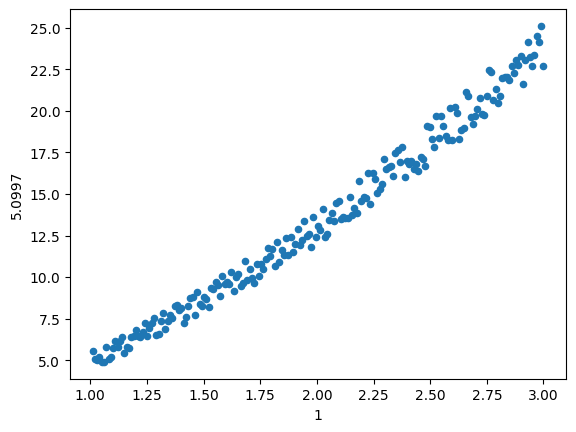

In [13]:
data.plot(kind='scatter', x = '1', y = '5.0997')

In [14]:
# Pré-processamento
#   Normalizando os dados

from sklearn.preprocessing import MinMaxScaler

normalizador = MinMaxScaler()
normalizador.fit(data)

dados_normalizados = pd.DataFrame(normalizador.transform(data), columns = data.columns)

X = dados_normalizados.drop(columns='5.0997')
y = dados_normalizados['5.0997']

XB = data.drop(columns='5.0997')
yB = data['5.0997']

dados_normalizados.head()

,1,5.0997
0,0.000000,0.032174
1,0.005025,0.009244
2,0.010101,0.004565
3,0.015126,0.014487
4,0.020202,0.000173


<Axes: xlabel='1', ylabel='5.0997'>

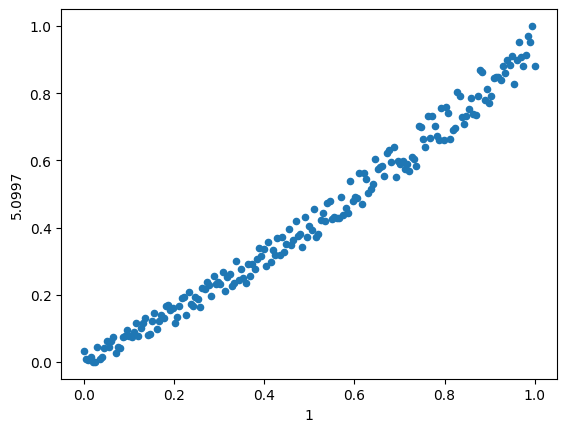

In [15]:
dados_normalizados.plot(kind='scatter', x = '1', y = '5.0997')

In [16]:
from sklearn.model_selection import train_test_split

X_trainB, X_testB, y_trainB, y_testB = train_test_split(XB, yB, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
corr = data.corr()
corr

,1,5.0997
1,1.000000,0.990464
5.0997,0.990464,1.000000


### Regressão Multipla == Regressão Simples

In [18]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lrB = LinearRegression()

lr.fit(X_train, y_train)
lrB.fit(X_trainB, y_trainB)

r = lr.score(X_test, y_test)
rB = lrB.score(X_testB, y_testB)

print('',"-"*50, '\nCom Normalização: r = ', r, '\n', '-'*50, '\nSem Normalização: rB = ', rB, '\n', '-'*50)

 -------------------------------------------------- 
Com Normalização: r =  0.9819707896273612 
 -------------------------------------------------- 
Sem Normalização: rB =  0.9819707896273612 
 --------------------------------------------------


In [19]:
import numpy as np 

X = dados_normalizados['1']
y = dados_normalizados['5.0997']

X = np.reshape(X, (-1,1))
y = np.reshape(y, (-1,1)).ravel()

XB = data['1']
yB = data['5.0997']

XB = np.reshape(XB, (-1,1))
yB = np.reshape(yB, (-1,1)).ravel()
# Separando os dados para o treinamento

from sklearn.model_selection import train_test_split

X_trainB, X_testB, y_trainB, y_testB = train_test_split(XB, yB, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lrB = LinearRegression()

lr.fit(X_train, y_train)
lrB.fit(X_trainB, y_trainB)

r = lr.score(X_test, y_test)
rB = lrB.score(X_testB, y_testB)

print('',"-"*50, '\nCom Normalização: r = ', r, '\n', '-'*50, '\nSem Normalização: rB = ', rB, '\n', '-'*50)

 -------------------------------------------------- 
Com Normalização: r =  0.9819707896273612 
 -------------------------------------------------- 
Sem Normalização: rB =  0.9819707896273612 
 --------------------------------------------------


### SVR

In [21]:
import numpy as np 

X = dados_normalizados['1']
y = dados_normalizados['5.0997']

X = np.reshape(X, (-1,1))
y = np.reshape(y, (-1,1)).ravel()

XB = data['1']
yB = data['5.0997']

XB = np.reshape(XB, (-1,1))
yB = np.reshape(yB, (-1,1)).ravel()
# Separando os dados para o treinamento

from sklearn.model_selection import train_test_split

X_trainB, X_testB, y_trainB, y_testB = train_test_split(XB, yB, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.svm import SVR

svr = SVR(kernel= 'linear')
svrB = SVR(kernel= 'linear')

svr.fit(X_train, y_train)
svrB.fit(X_trainB, y_trainB)


r = svr.score(X_test, y_test)
rB = svrB.score(X_testB, y_testB)

print('',"-"*50, '\nCom Normalização: r = ', r, '\n', '-'*50, '\nSem Normalização: rB = ', rB, '\n', '-'*50)

 -------------------------------------------------- 
Com Normalização: r =  0.957939511954398 
 -------------------------------------------------- 
Sem Normalização: rB =  0.9769804808673266 
 --------------------------------------------------
